#Encontro 05

**Referência de Leitura:**
1. Leitura prévia necessária: Montgomery et al (5ª. Edição): Seção 2.6 (pág. 46) e Exemplo 6.1 (pág. 306).

**Hoje:**
1. Analisar, graficamente, a associação entre duas variáveis quantitativas.
2. Compreender a medida nomeada coeficiente de covariância, no que tange ao significado da fórmula e uso do valor resultante para descrever associação entre variáveis.
3. Avaliar vantagens e desvantagens do coeficiente de covariância e buscar alternativa que compense seu mau uso (coeficiente de correlação).
4. Interpretar, descritivamente, valores dos coeficientes linear e angular para qualquer problema prático.
5. Fechamento do conteúdo.

**Próxima aula:**
1. Estudo para o Projeto 1! - Manipular a PNAD

___
Inicialmente, a base de dados Mundo.txt será explorada com intuito de entender a associação entre algumas de suas variáveis quantitativas. Esse conjunto de dados contém alguns indicadores socioeconômicos referentes ao ano de 2008 para 85 países, os quais são:  
X1: população em milhares de habitantes  
X2: densidade populacional  
X3: % de população urbana  
X4: expectativa de vida feminina  
X5: expectativa de vida masculina  
X6: crescimento populacional  
X7: mortalidade infantil  
X8: PIB per capita  
X9: % de mulheres alfabetizadas  
X10: população em 100.000 habitantes  

Os comandos abaixo abrem a base de dados:

In [3]:
%matplotlib inline

import os
import pandas as pd
import matplotlib as plt


In [4]:
Mundo = pd.read_table('Mundo.txt')
Mundo.head()

,Mundo,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,20500,25,18,44,45,3,168,205,14,0.21
1,2,33900,12,86,75,68,1,26,3408,95,0.34
2,3,3700,126,68,75,68,1,27,5000,100,0.04
3,4,17800,2,85,80,74,1,7,16848,100,0.18
4,5,7400,86,54,75,67,1,35,3000,100,0.07


Faça o histograma e calcule a média e a mediana da variável X3. Dá para inferir algo sobre a sua distribuição?

Axes(0.125,0.125;0.775x0.775)
count     85.000000
mean      53.211765
std       24.235007
min        5.000000
25%       35.000000
50%       54.000000
75%       72.000000
max      100.000000
Name: X3, dtype: float64
54.0


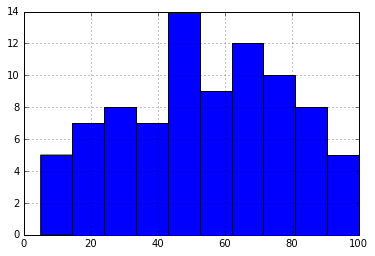

In [5]:
print(Mundo.X3.hist())

print(Mundo.X3.describe())

print(Mundo.X3.median())


#O cálculo da média e mediana de um gráfico/variável não consegue dizer muito a respeito da distribuição de dados que está sendo analisada.



Calcule a variância e desvio padrão de X3. Discorra sobre a diferença entre as duas medidas. Como elas afetam a distribuição?

In [6]:
X=Mundo.X3.std()
Y=Mundo.X3.var()
print(Y)
print(X)


# Elas conseguem mostrar a parte de dispersão dos dados analisados, sendo o desvio padrão um pouco mais relevante para a análise, por ter uma unidade de medida que não possui um quadrado.


587.3355742296917
24.235007205067873


___
A análise bidimensional tem como objetivo encontrar associação ou relação entre as variáveis quantitativas. Essas relações podem ser identificadas através de gráficos ou medidas numéricas. Entende-se por associação a mudança de opinião sobre o comportamento de uma variável na presença de informação sobre a segunda variável.

1) Um gráfico de dispersão pode ser utilizado para compreender a relação (ou seja, associação) entre duas variáveis quantitativas. Faça o gráfico de dispersão entre X3 e X4, X3 e X5, X3 e X6, X3 e X7. Escolha e interprete um dos gráficos.

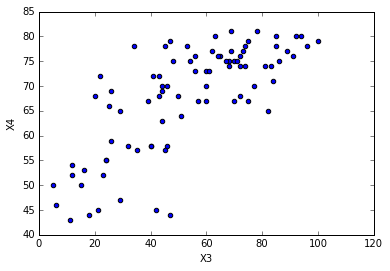

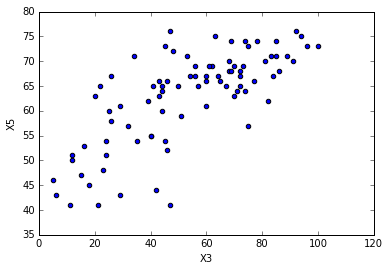

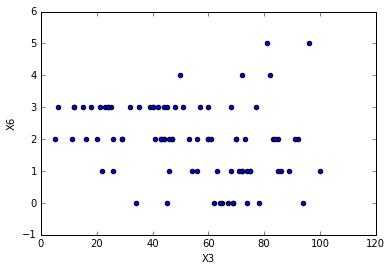

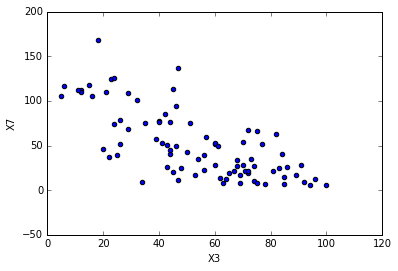

In [7]:
Mundo.plot(kind='scatter',x='X3',y='X4')
Mundo.plot(kind='scatter',x='X3',y='X5')
Mundo.plot(kind='scatter',x='X3',y='X6')
Mundo.plot(kind='scatter',x='X3',y='X7')


# Escolhendo o gráfico 3, podemos ter a inferência de que este gráfico representa uma variável qualitativa, pois o
# o modo com que os pontos estão dispersos reflete isso.

___
O gráfico de dispersão é uma ferramenta descritiva simples, porém útil para examinar uma possível relação entre variáveis quantitativas. A literatura estatística apresenta uma medida, nomeada de covariância:

$$\mathrm{Cov}(X, Y) = \frac{1}{n} \sum^n_{i=1}(x_i - \overline{x})(y_i - \overline{y}) \quad\quad\quad\quad (1)$$

2) Calcule a covariância dos pares utilizados no item 1. O que pode ser dito sobre os valores obtidos? Os valores dizem algo em magnitude? Contraste as interpretações gráficas e os resultados das covariâncias.

In [8]:
print(Mundo.X3.cov(Mundo.X4))
print(Mundo.X3.cov(Mundo.X5))
print(Mundo.X3.cov(Mundo.X6))
print(Mundo.X3.cov(Mundo.X7))

#Por meio da covariância por si só, não conseguimos obter muita informação sobre as distribuições só possuindo ela para
# análise, porém a relação entre a dispersão nos quadrantes do gráfico está diretamente ligada com o sinal de sua cova-
# riância.

194.349859944
166.230112045
-7.37338935574
-669.999159664


3) *Ignorando o sinal*, as variáveis Mortalidade Infantil (`X7`) e %População Urbana (`X3`) possui um coeficiente de covariância maior, mas a associação não parece ser mais forte, por exemplo, do que a observada entre as variáveis Expectativa de vida feminina (`X4`) e %População Urbana (`X3`). Achar outra medida e comparar com o resultado da covariância.

In [11]:
#Correlacao

#Corr(x,y)=Cov(x,y)/dvx*dvy

print(Mundo.X3.corr(Mundo.X7))

print(Mundo.X3.corr(Mundo.X4))






-0.722858872017
0.747773284605


In [17]:
print((Mundo.X3.cov(Mundo.X4)/(Mundo.X3.var())))

  

print(Mundo.X4.mean()-0.3309*Mundo.X3.mean())


0.330900882683
50.20399176470588


___
4) Ajuste de reta apenas para interpretação dos coeficientes:

Para um novo país (que não faz parte da amostra), sabe-se que o % de população urbana é igual a 73. 
Qual deve ser a expectativa de vida feminina esperada para esse novo país?

A solução pode ser pelo ajuste de uma reta: no caso, uma reta depende de um coeficiente linear (*a*) e de um coeficiente angular (*b*) e pode ser matematicamente expressa por:

$$\hat{y} = a + bx$$

Ainda sem entrar em detalhes, esses coeficientes devem ser obtidos a partir dos dados utilizando algumas medidas-resumo pelas seguintes expressões:

$$b = \frac{\mathrm{Cov}(X, Y)}{\mathrm{Var}(X)}$$

$$a = \overline{y} - b\overline{x}$$

Calcule esses coeficientes linear e angular e interprete-os para o problema em questão. Coloque a reta no gráfico de dispersão feito acima.

Considerando essa reta ajustada, qual deve ser a expectativa de vida feminina em um país com 73% da população vivendo na região urbana?

50.2039447956
0.330900882683


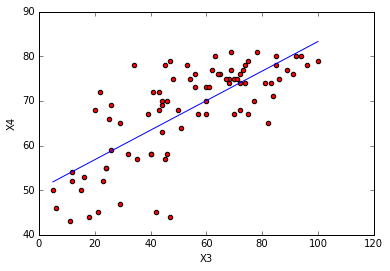

In [10]:
b=Mundo.X3.cov(Mundo.X4)/Mundo.X3.var()
   
a = Mundo.X4.mean()- b*Mundo.X3.mean()

import matplotlib.pyplot as plt

Mundo.plot.scatter(x='X3',y='X4',color='red')

plt.plot((Mundo.X3.min(),Mundo.X3.max()),(a+b*Mundo.X3.min(),a+b*Mundo.X3.max()),color='blue')

   
print(a)
print(b)


# A expectativa de vida feminina de um país com 73% da população vivendo em região urbana é aproximadamente 74.3 anos.



In [ ]:
# Como a função possui uma correlação de 0.74, podemos ter um grau maior de confiança sobre as inferências que tiramos
# sobre o gráfico, como a correlação, em módulo, vai de 0 a 1 (sendo 0 sem nenhuma relação e 1 totalmente relacionado)
# 0.74 é uma boa medida.










